# Visual story telling part 1: green buildings

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_raw = pd.read_csv('greenbuildings.csv')

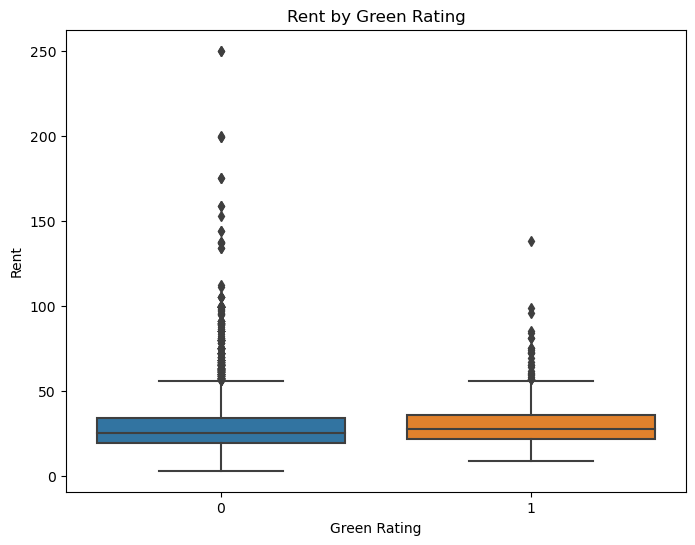

Rent (Median) for green buildings: 27.6
Rent (Median) for non-green buildings: 25.0


In [4]:
data_raw['green_rating'] = data_raw['green_rating'].astype('category')

plt.figure(figsize=(8, 6))
sns.boxplot(x='green_rating', y='Rent', data=data_raw)
plt.xlabel('Green Rating')
plt.ylabel('Rent')
plt.title('Rent by Green Rating')
plt.show()

print("Rent (Median) for green buildings:", data_raw[data_raw['green_rating'] == 1]['Rent'].median())
print("Rent (Median) for non-green buildings:", data_raw[data_raw['green_rating'] == 0]['Rent'].median())

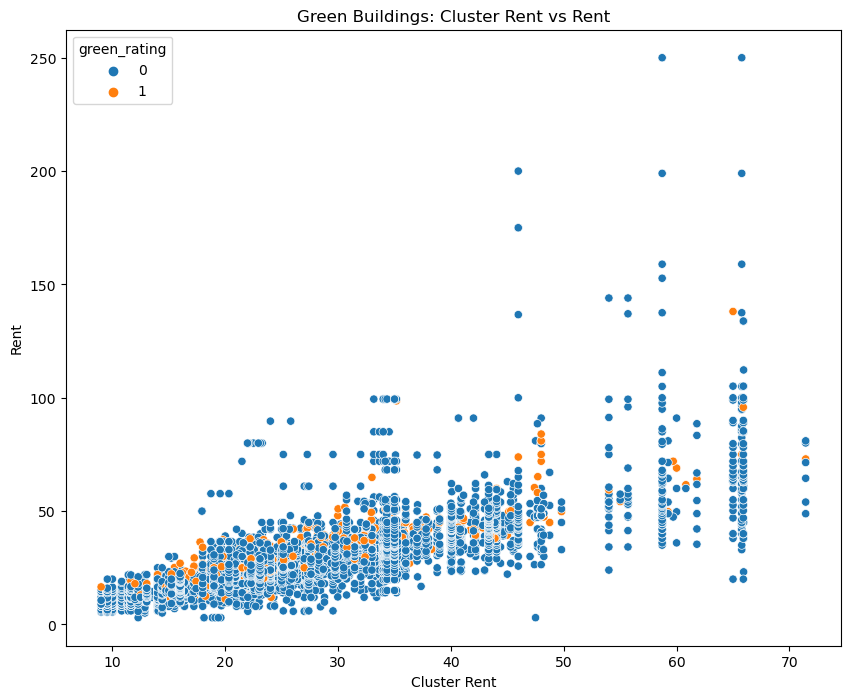

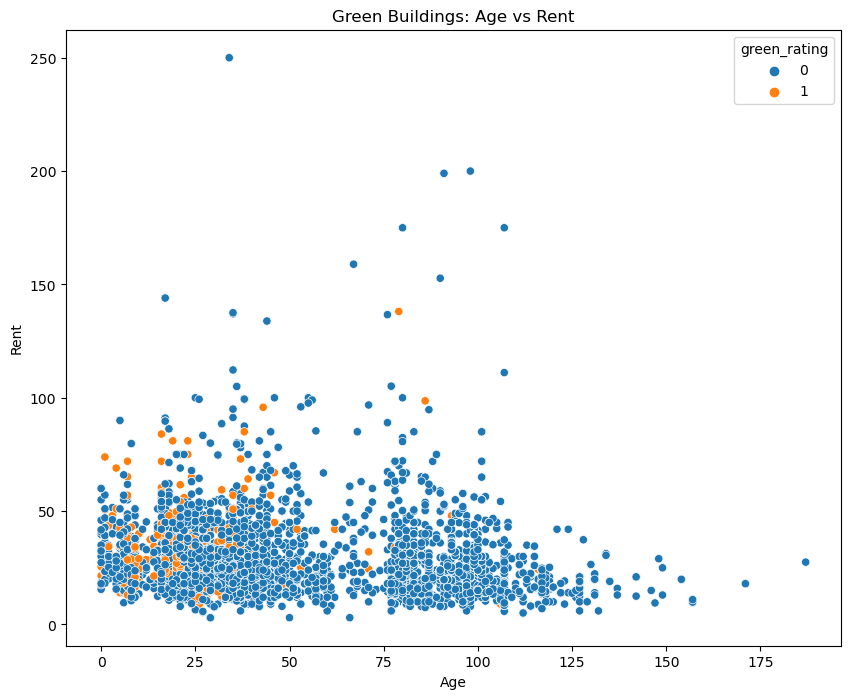

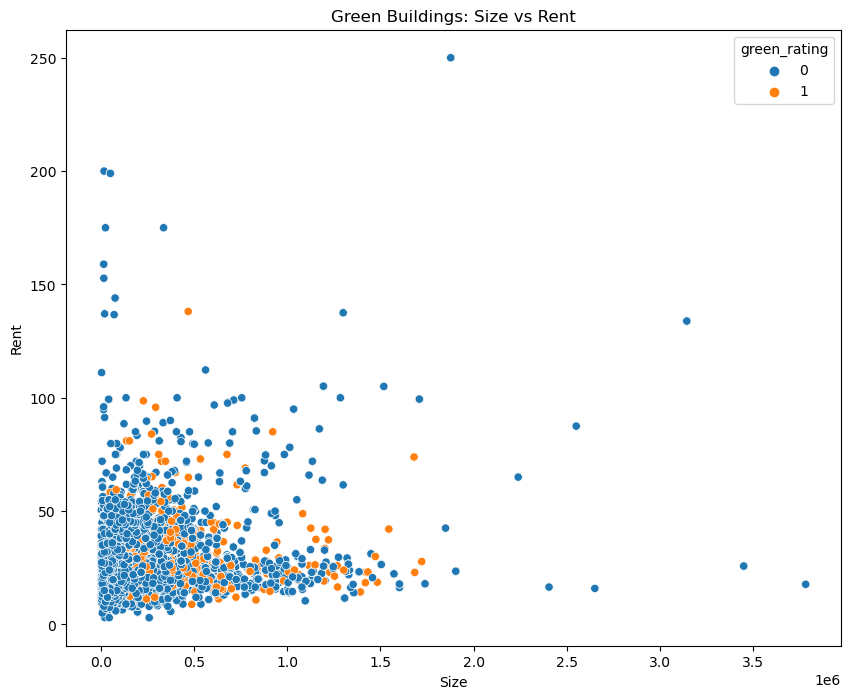

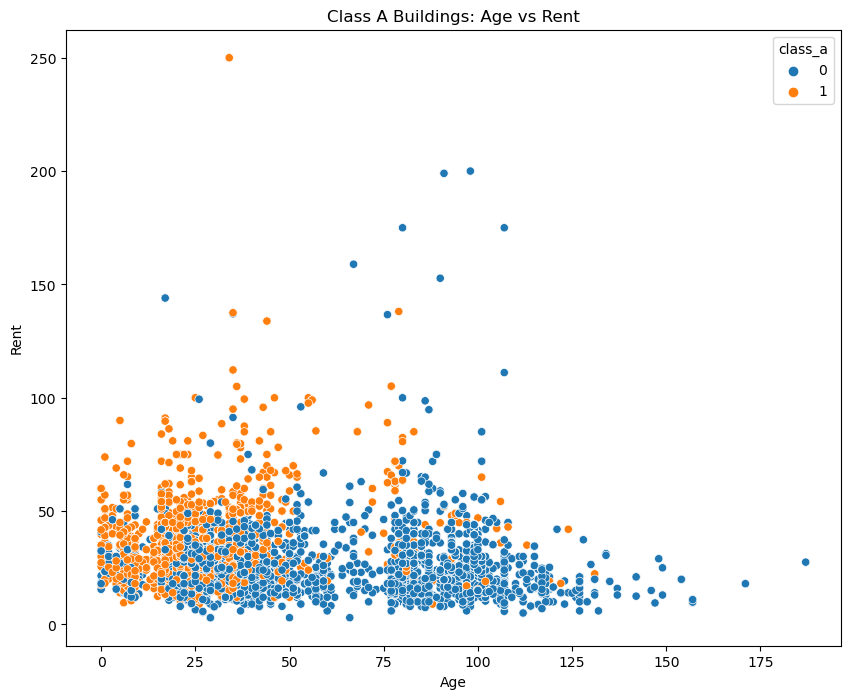

In [5]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='cluster_rent', y='Rent', hue='green_rating', data=data_raw)
plt.xlabel('Cluster Rent')
plt.ylabel('Rent')
plt.title('Green Buildings: Cluster Rent vs Rent')
plt.show()

plt.figure(figsize=(10, 8))
sns.scatterplot(x='age', y='Rent', hue='green_rating', data=data_raw)
plt.xlabel('Age')
plt.ylabel('Rent')
plt.title('Green Buildings: Age vs Rent')
plt.show()

plt.figure(figsize=(10, 8))
sns.scatterplot(x='size', y='Rent', hue='green_rating', data=data_raw)
plt.xlabel('Size')
plt.ylabel('Rent')
plt.title('Green Buildings: Size vs Rent')
plt.show()

plt.figure(figsize=(10, 8))
sns.scatterplot(x='age', y='Rent', hue='class_a', data=data_raw)
plt.xlabel('Age')
plt.ylabel('Rent')
plt.title('Class A Buildings: Age vs Rent')
plt.show()

**Notable Findings:**

1. There exists a correlation between rent and cluster rent.
2. As anticipated, rent demonstrates correlation with property size.
3. A predominant proportion of Class A buildings exhibit relatively youthful ages.
4. The influence of age on rent is not particularly strong.
5. Elevated rental rates for Class A buildings reflect their premium status.

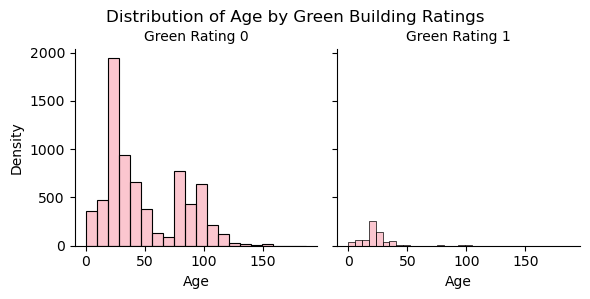

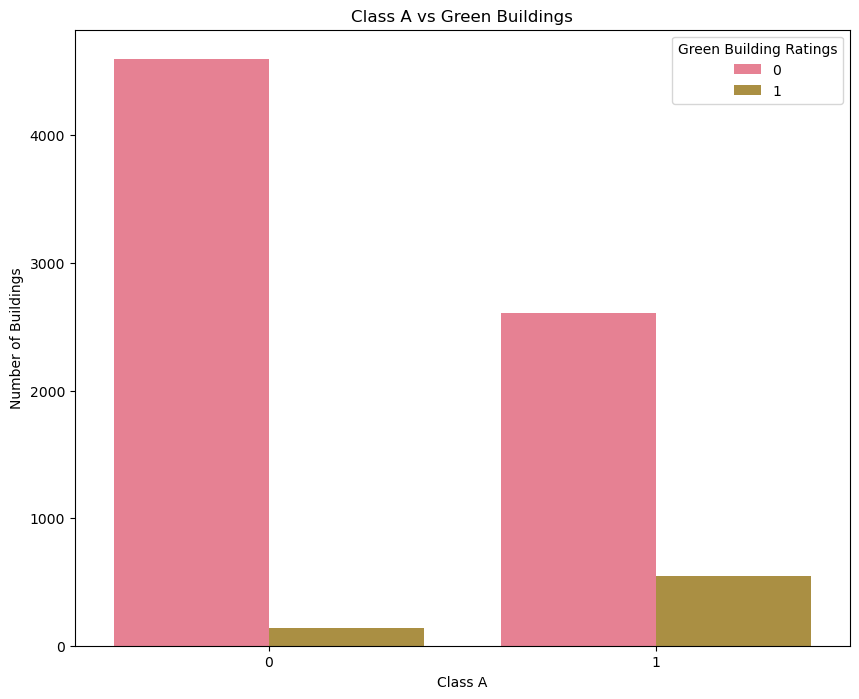

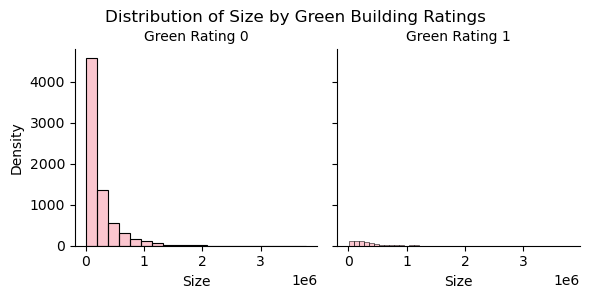

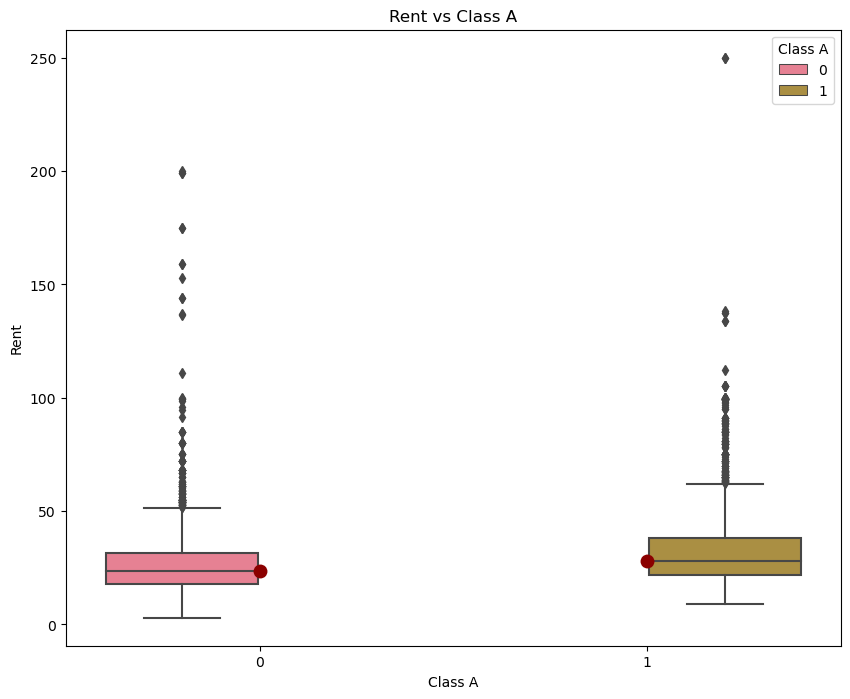

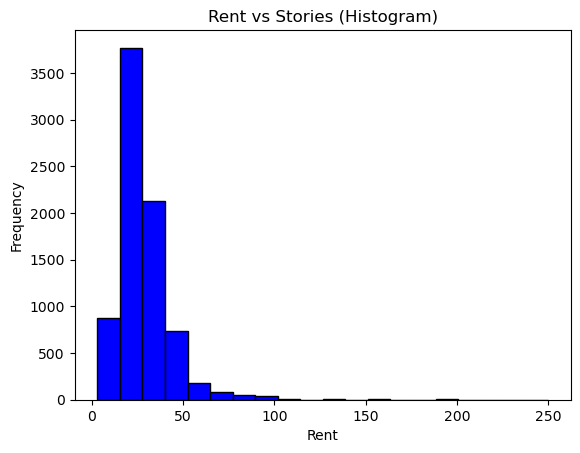

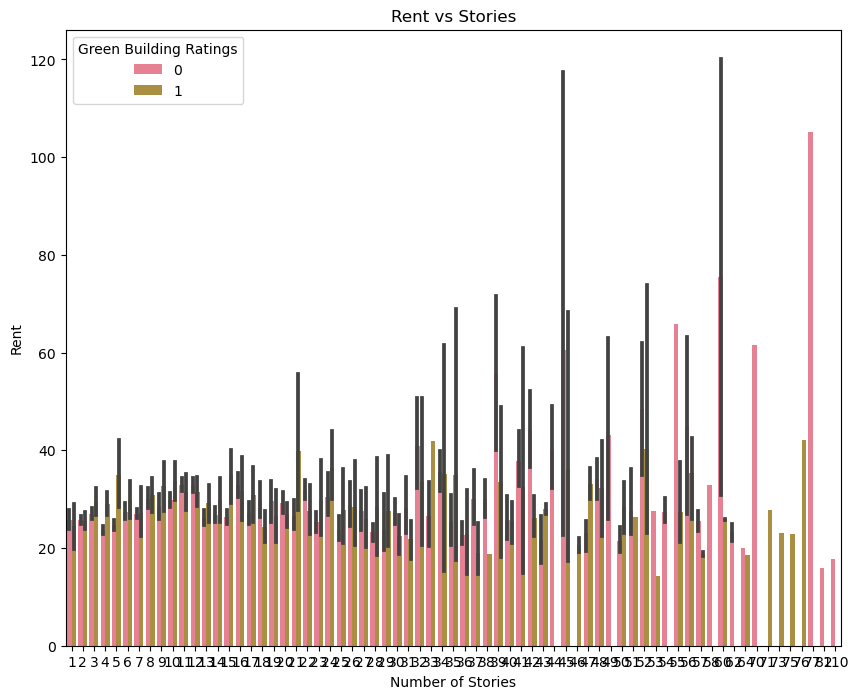

In [6]:
sns.set_palette("husl")
g = sns.FacetGrid(data_raw, col='green_rating')
g.map(sns.histplot, 'age', bins=20, alpha=0.4)
g.set_axis_labels("Age", "Density")
g.set_titles(col_template="Green Rating {col_name}")
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Distribution of Age by Green Building Ratings')
plt.show()

plt.figure(figsize=(10, 8))
sns.countplot(data=data_raw, x='class_a', hue='green_rating', dodge=True)
plt.xlabel('Class A')
plt.ylabel('Number of Buildings')
plt.title('Class A vs Green Buildings')
plt.legend(title='Green Building Ratings')
plt.show()

g = sns.FacetGrid(data_raw, col='green_rating')
g.map(sns.histplot, 'size', bins=20, alpha=0.4)
g.set_axis_labels("Size", "Density")
g.set_titles(col_template="Green Rating {col_name}")
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Distribution of Size by Green Building Ratings')
plt.show()

medians = data_raw.groupby('class_a')['Rent'].median().reset_index()
plt.figure(figsize=(10, 8))
sns.boxplot(data=data_raw, x='class_a', y='Rent', hue='class_a')
sns.stripplot(data=medians, x='class_a', y='Rent', color='darkred', marker='o', size=10, linewidth=0)
plt.xlabel('Class A')
plt.ylabel('Rent')
plt.title('Rent vs Class A')
plt.legend(title='Class A', loc='upper right')
plt.show()

plt.hist(data_raw[data_raw['Rent'] < 5000]['Rent'].dropna(), bins=20, color='blue', edgecolor='black')
plt.xlabel('Rent')
plt.ylabel('Frequency')
plt.title('Rent vs Stories (Histogram)')
plt.show()

plt.figure(figsize=(10, 8))
sns.barplot(x='stories', y='Rent', hue='green_rating', data=data_raw)
plt.xlabel('Number of Stories')
plt.ylabel('Rent')
plt.title('Rent vs Stories')
plt.legend(title='Green Building Ratings')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_33144\1854712626.py:3: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  g_age_density = sns.displot(data_raw, x='age', hue='green_rating', element='step', fill=True, alpha=0.4, palette=custom_palette)


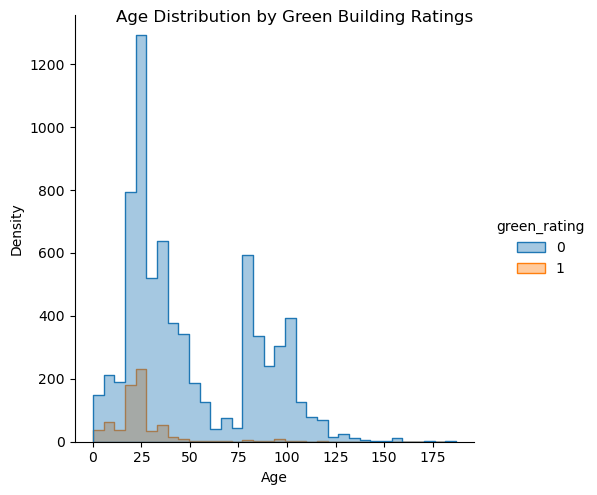

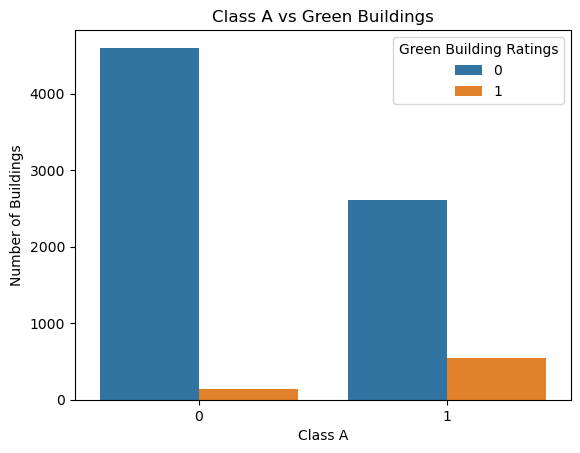

C:\Users\DELL\AppData\Local\Temp\ipykernel_33144\1854712626.py:16: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  g_size_density = sns.displot(data_raw, x='size', hue='green_rating', element='step', fill=True, alpha=0.4, palette=custom_palette)


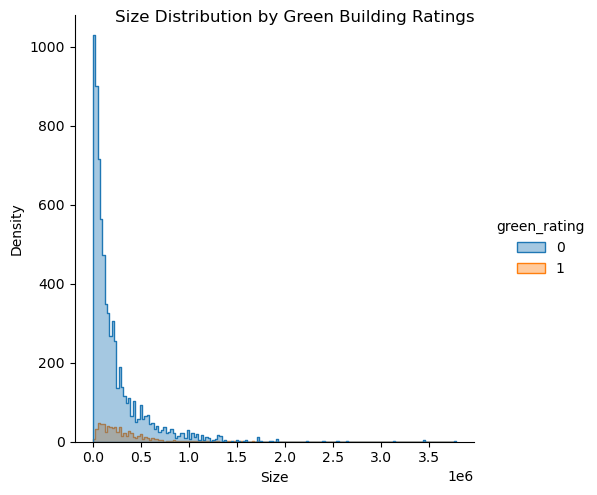

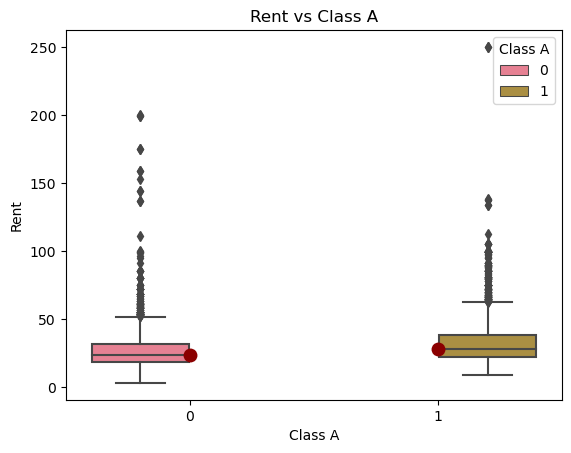

C:\Users\DELL\AppData\Local\Temp\ipykernel_33144\1854712626.py:31: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  hist_rent_vs_stories = sns.histplot(data_raw, x='stories', hue='green_rating', bins=20, element='step', fill=True, alpha=0.4, palette=custom_palette)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


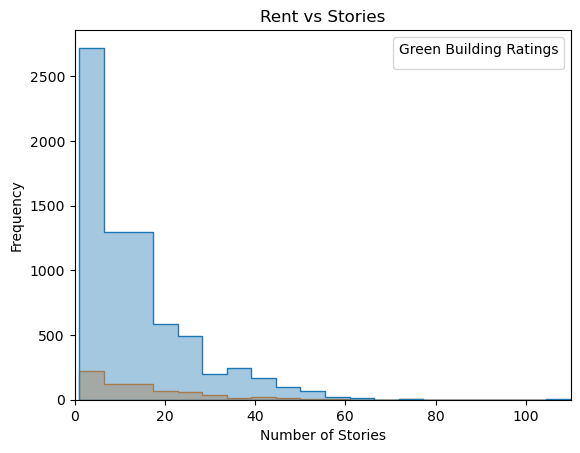

In [7]:
custom_palette = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"]

g_age_density = sns.displot(data_raw, x='age', hue='green_rating', element='step', fill=True, alpha=0.4, palette=custom_palette)
g_age_density.set_axis_labels("Age", "Density")
g_age_density.set_titles("Green Building Ratings: {col_name}")
g_age_density.fig.suptitle('Age Distribution by Green Building Ratings')
plt.show()

bar_class_a = sns.countplot(data=data_raw, x='class_a', hue='green_rating', dodge=True, palette=custom_palette)
bar_class_a.set_xlabel('Class A')
bar_class_a.set_ylabel('Number of Buildings')
bar_class_a.set_title('Class A vs Green Buildings')
plt.legend(title='Green Building Ratings')
plt.show()

g_size_density = sns.displot(data_raw, x='size', hue='green_rating', element='step', fill=True, alpha=0.4, palette=custom_palette)
g_size_density.set_axis_labels("Size", "Density")
g_size_density.set_titles("Green Building Ratings: {col_name}")
g_size_density.fig.suptitle('Size Distribution by Green Building Ratings')
plt.show()

medians = data_raw.groupby('class_a')['Rent'].median().reset_index()
boxplot_rent_class_a = sns.boxplot(data=data_raw, x='class_a', y='Rent', hue='class_a')
sns.stripplot(data=medians, x='class_a', y='Rent', color='darkred', marker='o', size=10, linewidth=0)
boxplot_rent_class_a.set_xlabel('Class A')
boxplot_rent_class_a.set_ylabel('Rent')
boxplot_rent_class_a.set_title('Rent vs Class A')
plt.legend(title='Class A', loc='upper right')
plt.show()

hist_rent_vs_stories = sns.histplot(data_raw, x='stories', hue='green_rating', bins=20, element='step', fill=True, alpha=0.4, palette=custom_palette)
hist_rent_vs_stories.set_xlabel('Number of Stories')
hist_rent_vs_stories.set_ylabel('Frequency')
hist_rent_vs_stories.set_title('Rent vs Stories')
hist_rent_vs_stories.set_xlim(0, data_raw['stories'].max())
plt.legend(title='Green Building Ratings')
plt.show()

**Key Findings:**

1. Green buildings tend to have a higher proportion of younger structures compared to non-green buildings.
2. The prevalence of Class A buildings is notably greater within the green building category.
3. Building size exhibits a positive correlation with both green and non-green designations.
4. Substantial rent disparities are observable between Class A and non-Class A buildings.

C:\Users\DELL\AppData\Local\Temp\ipykernel_33144\3072876201.py:5: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.lineplot(data=medians_age, x='age_cat', y='Rent', hue='green_rating', palette=custom_palette)


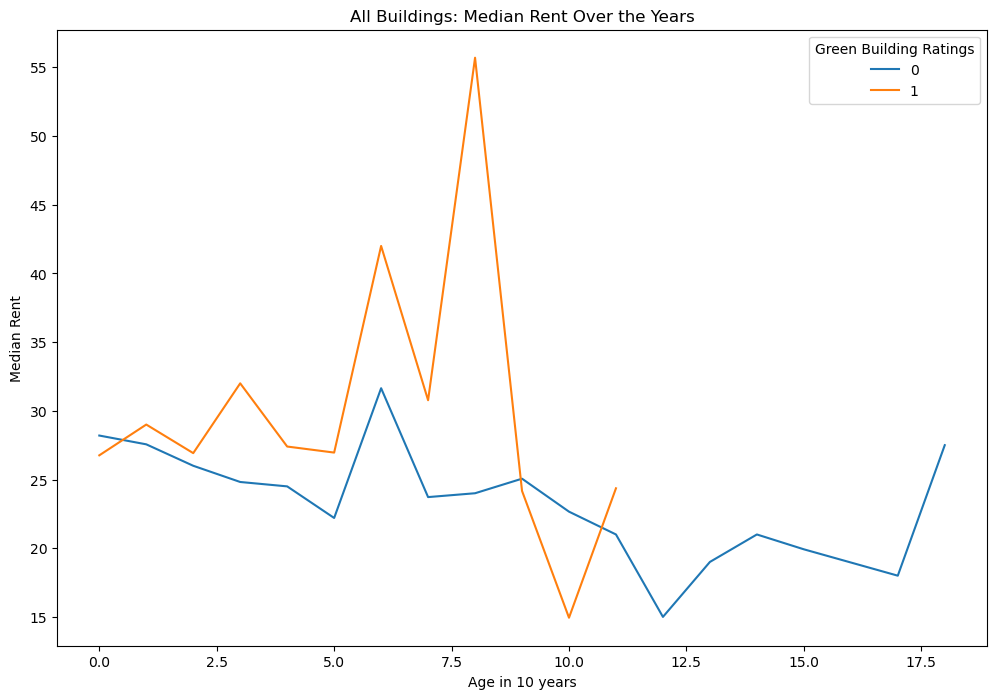

C:\Users\DELL\AppData\Local\Temp\ipykernel_33144\3072876201.py:16: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.lineplot(data=medians_size, x='size_cat', y='Rent', hue='green_rating', palette=custom_palette)


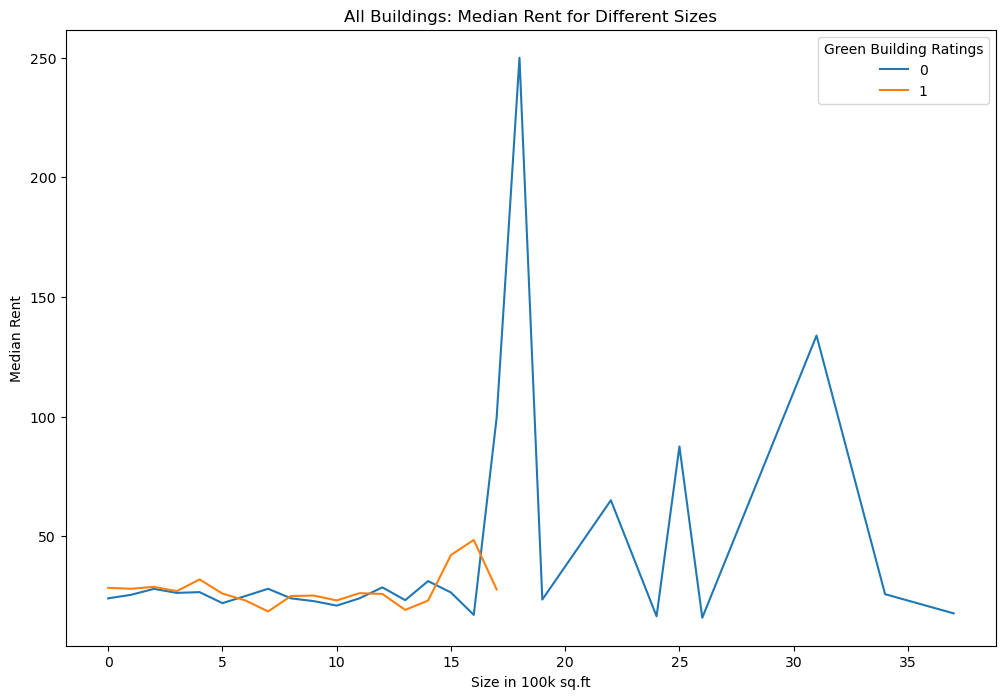

C:\Users\DELL\AppData\Local\Temp\ipykernel_33144\3072876201.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_non_class_a['age_cat'] = pd.cut(data_non_class_a['age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190], labels=False)
C:\Users\DELL\AppData\Local\Temp\ipykernel_33144\3072876201.py:28: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.lineplot(data=medians_age_non_class_a, x='age_cat', y='Rent', hue='green_rating', palette=custom_palette)


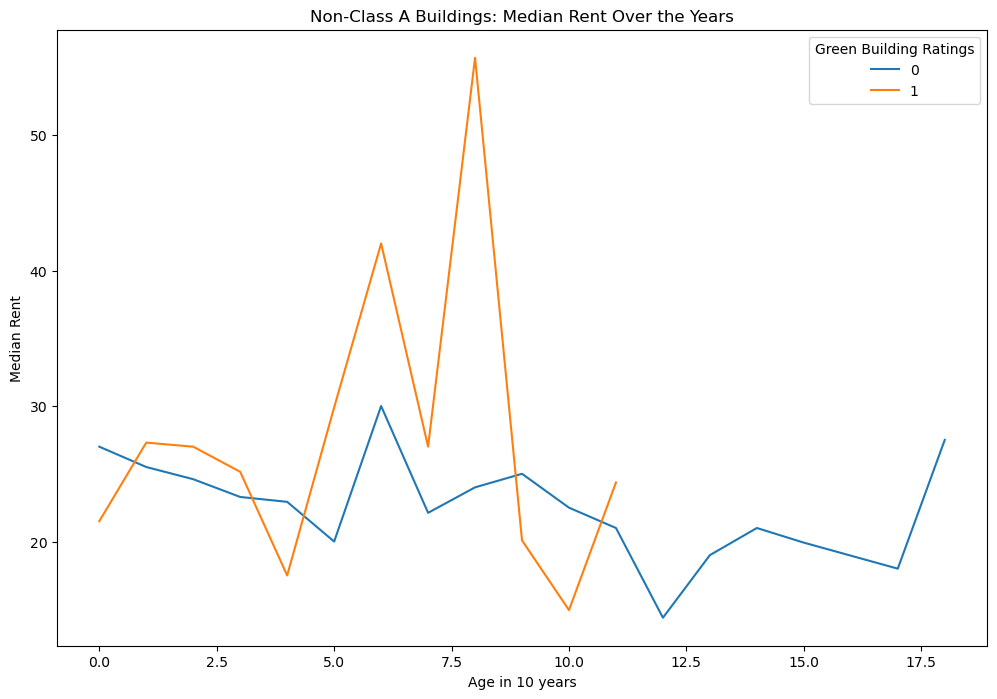

C:\Users\DELL\AppData\Local\Temp\ipykernel_33144\3072876201.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_non_class_a['size_cat'] = pd.cut(data_non_class_a['size'], bins=[0, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000, 1100000, 1200000, 1300000, 1400000, 1500000, 1600000, 1700000, 1800000, 1900000, 2000000, 2100000, 2200000, 2300000, 2400000, 2500000, 2600000, 2700000, 2800000, 2900000, 3000000, 3100000, 3200000, 3300000, 3400000, 3500000, 3600000, 3700000, 3800000], labels=False)
C:\Users\DELL\AppData\Local\Temp\ipykernel_33144\3072876201.py:39: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.lineplot(data=medians_size_non_class_a, x='size_cat', y

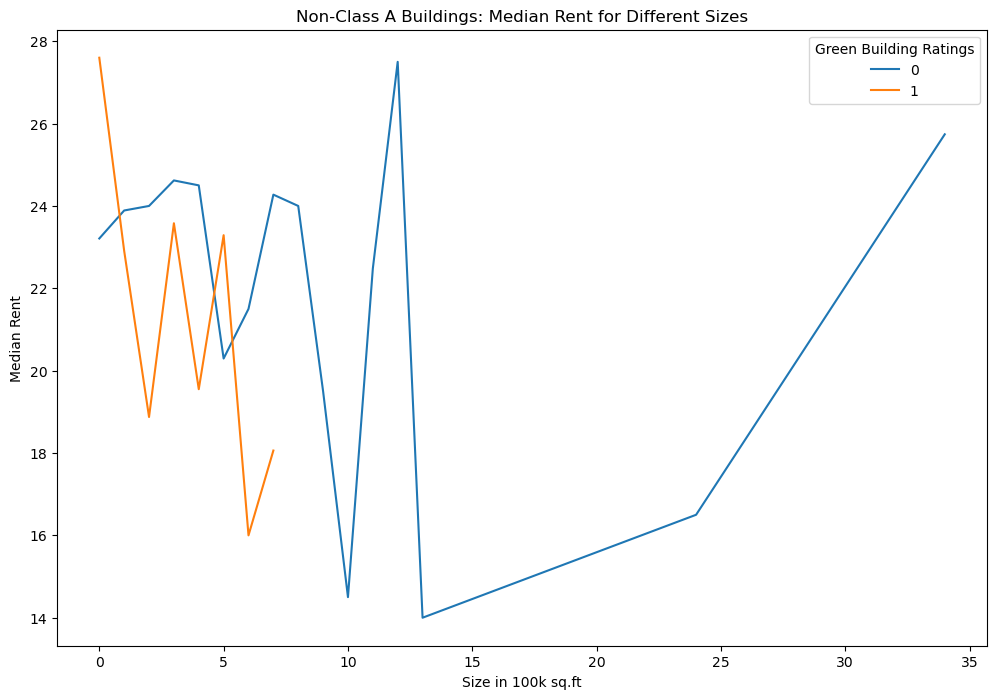

In [8]:
data_raw['age_cat'] = pd.cut(data_raw['age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190], labels=False)
medians_age = data_raw.groupby(['age_cat', 'green_rating'])['Rent'].median().reset_index()

plt.figure(figsize=(12, 8))
sns.lineplot(data=medians_age, x='age_cat', y='Rent', hue='green_rating', palette=custom_palette)
plt.xlabel('Age in 10 years')
plt.ylabel('Median Rent')
plt.title('All Buildings: Median Rent Over the Years')
plt.legend(title='Green Building Ratings')
plt.show()

data_raw['size_cat'] = pd.cut(data_raw['size'], bins=[0, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000, 1100000, 1200000, 1300000, 1400000, 1500000, 1600000, 1700000, 1800000, 1900000, 2000000, 2100000, 2200000, 2300000, 2400000, 2500000, 2600000, 2700000, 2800000, 2900000, 3000000, 3100000, 3200000, 3300000, 3400000, 3500000, 3600000, 3700000, 3800000], labels=False)
medians_size = data_raw.groupby(['size_cat', 'green_rating'])['Rent'].median().reset_index()

plt.figure(figsize=(12, 8))
sns.lineplot(data=medians_size, x='size_cat', y='Rent', hue='green_rating', palette=custom_palette)
plt.xlabel('Size in 100k sq.ft')
plt.ylabel('Median Rent')
plt.title('All Buildings: Median Rent for Different Sizes')
plt.legend(title='Green Building Ratings')
plt.show()

data_non_class_a = data_raw[data_raw['class_a'] != 1]
data_non_class_a['age_cat'] = pd.cut(data_non_class_a['age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190], labels=False)
medians_age_non_class_a = data_non_class_a.groupby(['age_cat', 'green_rating'])['Rent'].median().reset_index()

plt.figure(figsize=(12, 8))
sns.lineplot(data=medians_age_non_class_a, x='age_cat', y='Rent', hue='green_rating', palette=custom_palette)
plt.xlabel('Age in 10 years')
plt.ylabel('Median Rent')
plt.title('Non-Class A Buildings: Median Rent Over the Years')
plt.legend(title='Green Building Ratings')
plt.show()

data_non_class_a['size_cat'] = pd.cut(data_non_class_a['size'], bins=[0, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000, 1100000, 1200000, 1300000, 1400000, 1500000, 1600000, 1700000, 1800000, 1900000, 2000000, 2100000, 2200000, 2300000, 2400000, 2500000, 2600000, 2700000, 2800000, 2900000, 3000000, 3100000, 3200000, 3300000, 3400000, 3500000, 3600000, 3700000, 3800000], labels=False)
medians_size_non_class_a = data_non_class_a.groupby(['size_cat', 'green_rating'])['Rent'].median().reset_index()

plt.figure(figsize=(12, 8))
sns.lineplot(data=medians_size_non_class_a, x='size_cat', y='Rent', hue='green_rating', palette=custom_palette)
plt.xlabel('Size in 100k sq.ft')
plt.ylabel('Median Rent')
plt.title('Non-Class A Buildings: Median Rent for Different Sizes')
plt.legend(title='Green Building Ratings')
plt.show()

**Key Insights**

1. Rent values for green buildings are comparatively lower than those for non-green buildings, particularly in the absence of a Class A classification.
2. The variation in rent differences across different sizes and ages underscores the non-uniform nature of these disparities
3. Green buildings with a Class A designation exhibit higher rents compared to non-green buildings at a size of 250,000 sq ft.

In [9]:
data_size_class_a = data_raw[(data_raw['size'] > 200000) & (data_raw['size'] < 300000) & (data_raw['class_a'] == 1)]
median_leasing_rate_class_a = data_size_class_a['leasing_rate'].median()

medians_class_a = data_size_class_a.groupby(['age_cat', 'green_rating'])['Rent'].median().reset_index()
rent_class_a_green = medians_class_a[medians_class_a['green_rating'] == 1].sort_values(by='age_cat')['Rent'][:5]
rent_class_a_non_green = medians_class_a[medians_class_a['green_rating'] == 0].sort_values(by='age_cat')['Rent'][:5]
diff_rent_class_a_first_5_years = ((rent_class_a_green.sum() - rent_class_a_non_green.sum()) / 5).round(2)

data_size_non_class_a = data_raw[(data_raw['size'] > 200000) & (data_raw['size'] < 300000) & (data_raw['class_a'] != 1)]
medians_non_class_a = data_size_non_class_a.groupby(['age_cat', 'green_rating'])['Rent'].median().reset_index()
rent_non_class_a_green = medians_non_class_a[medians_non_class_a['green_rating'] == 1].sort_values(by='age_cat')['Rent'][:5]
rent_non_class_a_non_green = medians_non_class_a[medians_non_class_a['green_rating'] == 0].sort_values(by='age_cat')['Rent'][:5]
diff_rent_non_class_a_first_5_years = ((rent_non_class_a_green.sum() - rent_non_class_a_non_green.sum()) / 5).round(2)

msg_leasing_rate = f"Median leasing rate for Class A buildings (sizes 200k to 300k sq.ft): ${median_leasing_rate_class_a:.2f}"
msg_diff_rent_class_a = f"Difference in rent for the first 5 years (Class A buildings): ${diff_rent_class_a_first_5_years:.2f}"
msg_diff_rent_non_class_a = f"Difference in rent for the first 5 years (non-Class A buildings): ${diff_rent_non_class_a_first_5_years:.2f}"

print(msg_leasing_rate)
print(msg_diff_rent_class_a)
print(msg_diff_rent_non_class_a)


Median leasing rate for Class A buildings (sizes 200k to 300k sq.ft): $91.61
Difference in rent for the first 5 years (Class A buildings): $6.37
Difference in rent for the first 5 years (non-Class A buildings): $-3.46


**Key Observations and Suggestions**

The analysis conducted by the statistics expert appears to have limitations due to overlooking critical variables that influence rental outcomes. Primarily, their approach relies on the median rent across all building types, neglecting crucial factors like building size and classification. As demonstrated, the evaluation should encompass additional aspects, including the building's class. For example, it's evident that Class A buildings, especially when green, yield superior rental returns compared to non-green structures.

In [10]:
occupancy_rate = 0.916
years_to_recover_costs = round(5000000 / (3.097 * 250000 * occupancy_rate), 2)
recovery_msg = f"With the construction of a Class A green building, considering an occupancy rate of {occupancy_rate * 100:.2f}%, it is estimated to recoup expenses in approximately {years_to_recover_costs:.2f} years."
print(recovery_msg)

With the construction of a Class A green building, considering an occupancy rate of 91.60%, it is estimated to recoup expenses in approximately 7.05 years.


**Calculation Considerations**

1. The variation in rent differences across distinct sizes and ages underscores the impracticality of employing a fixed rent difference for return calculations.
2. Consequently, it's advisable to focus solely on buildings with sizes ranging from 200k to 300k sq.ft due to this variability.
3. To accurately reflect the situation, utilizing the median leasing rate for such buildings is more appropriate than an assumed 90% rate.
4. Worth noting is the lack of information pertaining to Class A buildings within the specified size range (200k to 300k sq.ft), prompting the use of the average 5-year return as a basis for conclusive recommendations.

**Conclusive Recommendation**

1. Opting for a green building investment is advisable only for Class-A buildings, given the positive 5-year average returns.
2. Prioritizing the construction of Class-A green buildings is recommended for favorable financial outcomes.
3. Anticipating an occupancy rate of 91.6% adds to the positive outlook.
4. Notably, the average rent difference between green and non-green Class-A buildings (sizes 200k to 300k sq.ft) is 3.097.
5. Consequently, for a 250k sq.ft building with a 91.6% occupancy rate, the anticipated cost recovery period is approximately 7.05 years.